# *PART I: Theory Questions*

***K-Nearest Neighbor Classification***

# Q1.1

**Assume that you have a large training dataset. Specify a disadvantage of the k-Nearest Neighbor method when using it during testing. State also your reason about your answer.**


In k-Nearest Neighbor algortihm, we need to compute the distances between data points and all of data points in the training set for each data point. With a large training set, this can be too much time consuming and it's computational complexity goes extremely large. Searching for the nearest neighbors in a large dataset can involve a lot of unnecessary distance computations and this can make the algorithm work slower and inefficient for large datasets. And also it requires to store all the data in training set in memory, this can lead to memory limitations if memory resources are limited. 

# Q1.2
**Considering the image below, state an optimal k-value depending on that the algorithm
you are using is k-Nearest Neighbor. State also your reason behind the optimal value
you preferred.**


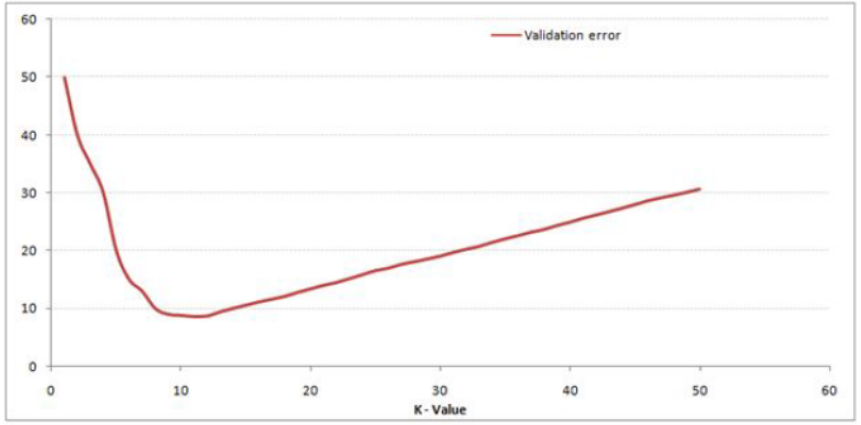

The optimal k-value in this situation should be k=11. Because we're looking for the lowest error rate in our model and in this graph we can see that the lowest validation error is at k=11.

# Q1.3
**Assume that you have the following training set of positive (+), negative (-) instances
and a single test instance (o) in the image below (Figure 1). Assume also that the
Euclidean metric is used for measuring the distance between instances. Finally consider
that every nearest neighbor instance affects the final vote equally.**


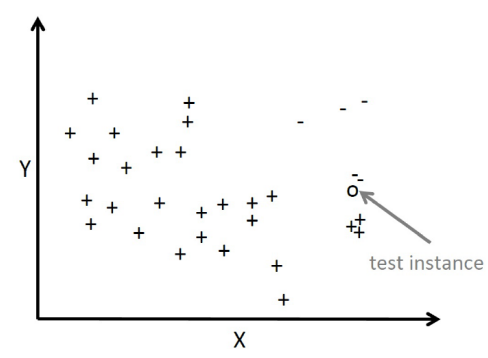

**• What is the class appointed to the test instance for K=1? State also reason
behind your answer.** 

For the value k=1, the class of the test instance would be the same with its nearest neighbors. So appointed class to the test instance is (-) in this case.

**• What is the class appointed to the test instance for K=3? State also reason
behind your answer.** 

For the value k=3, we're looking for the instance's three nearest neighbors, and two of them has (-) class, one has (+) class. So the instance has (-) class.

**• What is the class appointed to the test instance for K=5? State also reason
behind your answer.** 

In this case we should look for five nearest neighbors of instance, the upper two is (-), lower three is (+). Then the test instance is (+) for the value k=5.

# Q1.4
**Fill the blanks with T (True) or F (False) for the statements below:**

• If all instances of the data have the same scale then k-Nearest Neighbor’s performance increases drastically. (**True**)

• While k-Nearest Neighbor performs well with a small number of input variables,
it’s performance decreases when the number of inputs becomes large. (**True**)

• k-Nearest Neighbor makes supposes nothing about the functional form of the
problem it handles. (**True**)




***
***Linear Regression***

# Q2.1
**Assume that you have five students have registered to a class and the class have a midterm and the final exam. You have obtained a set of their marks on two exams, which is in the table below:**

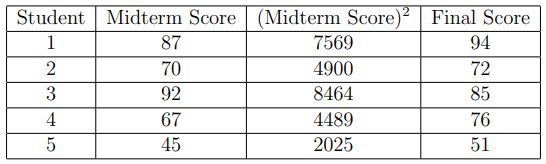

**You plan to a model which form’s is $f_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$ for fitting the data above. The $x_1$ shows midterm exam score while $x_2$ shows square of the midterm score. Besides you plan to use feature scaling (using divide operation by the ”max-min”, or range, of a feature) and mean normalization. What is the normalized value of the feature $x_{5}^{2}$?**

$x_{5}^{2}$': normalized value of $x_{5}^{2}$             

𝜇 : mean of the original $x_2$ values



𝜇 = (7569 + 4900 +8464 + 4489 +2025) / 5

𝜇 = 27447 / 5 

𝜇 = 5489.4


$x_{5}^{2}$' = ($x_2$ - 𝜇) / (max($x_2$) - min($x_2$))

$x_{5}^{2}$' = (2025 - 5489.4) / (8464 - 2025)

$x_{5}^{2}$' = -3464.4 / 6439

$x_{5}^{2}$' = -0.538




# Q2.2
**Considering the figure below, which of the offsets used in linear regressions least square line fit? Assume that horizontal axis represents independent variable and vertical axis represents dependent variable. State your answer with your proper explanation.**


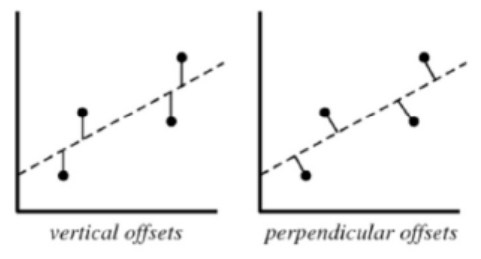

Vertical offsets should be used because these offsets are the vertical distances with the actual data points and parallel to the y-axis and we need the distance between actual value and predicted value on the same independent value so this is minimizing the sum of distances which is the aim of least square method so vertical offsets fits better.

# Q2.3
**Considering the table below, consisting of four training examples:**

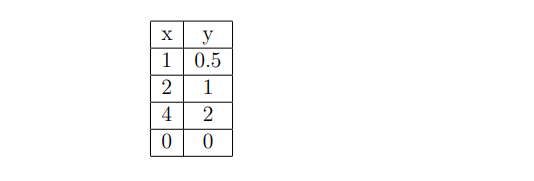

**Assume that you are trying to fit the data above to the linear regression model**

**$f_{\theta}(x) = \theta_0 + \theta_1 x_1$** 

**Find the $\theta_0$ and $\theta_1$ values by using closed form solution**

**$\theta = (X^T X)^{-1} X^T y$.** 

**Also state dimension values of $X$, $y$, and $\theta$ matrices. Finally, show your calculations step by step.** 

[$\theta_0 , \theta_1$] = [0, 0.5]

Calculations are here as an image:
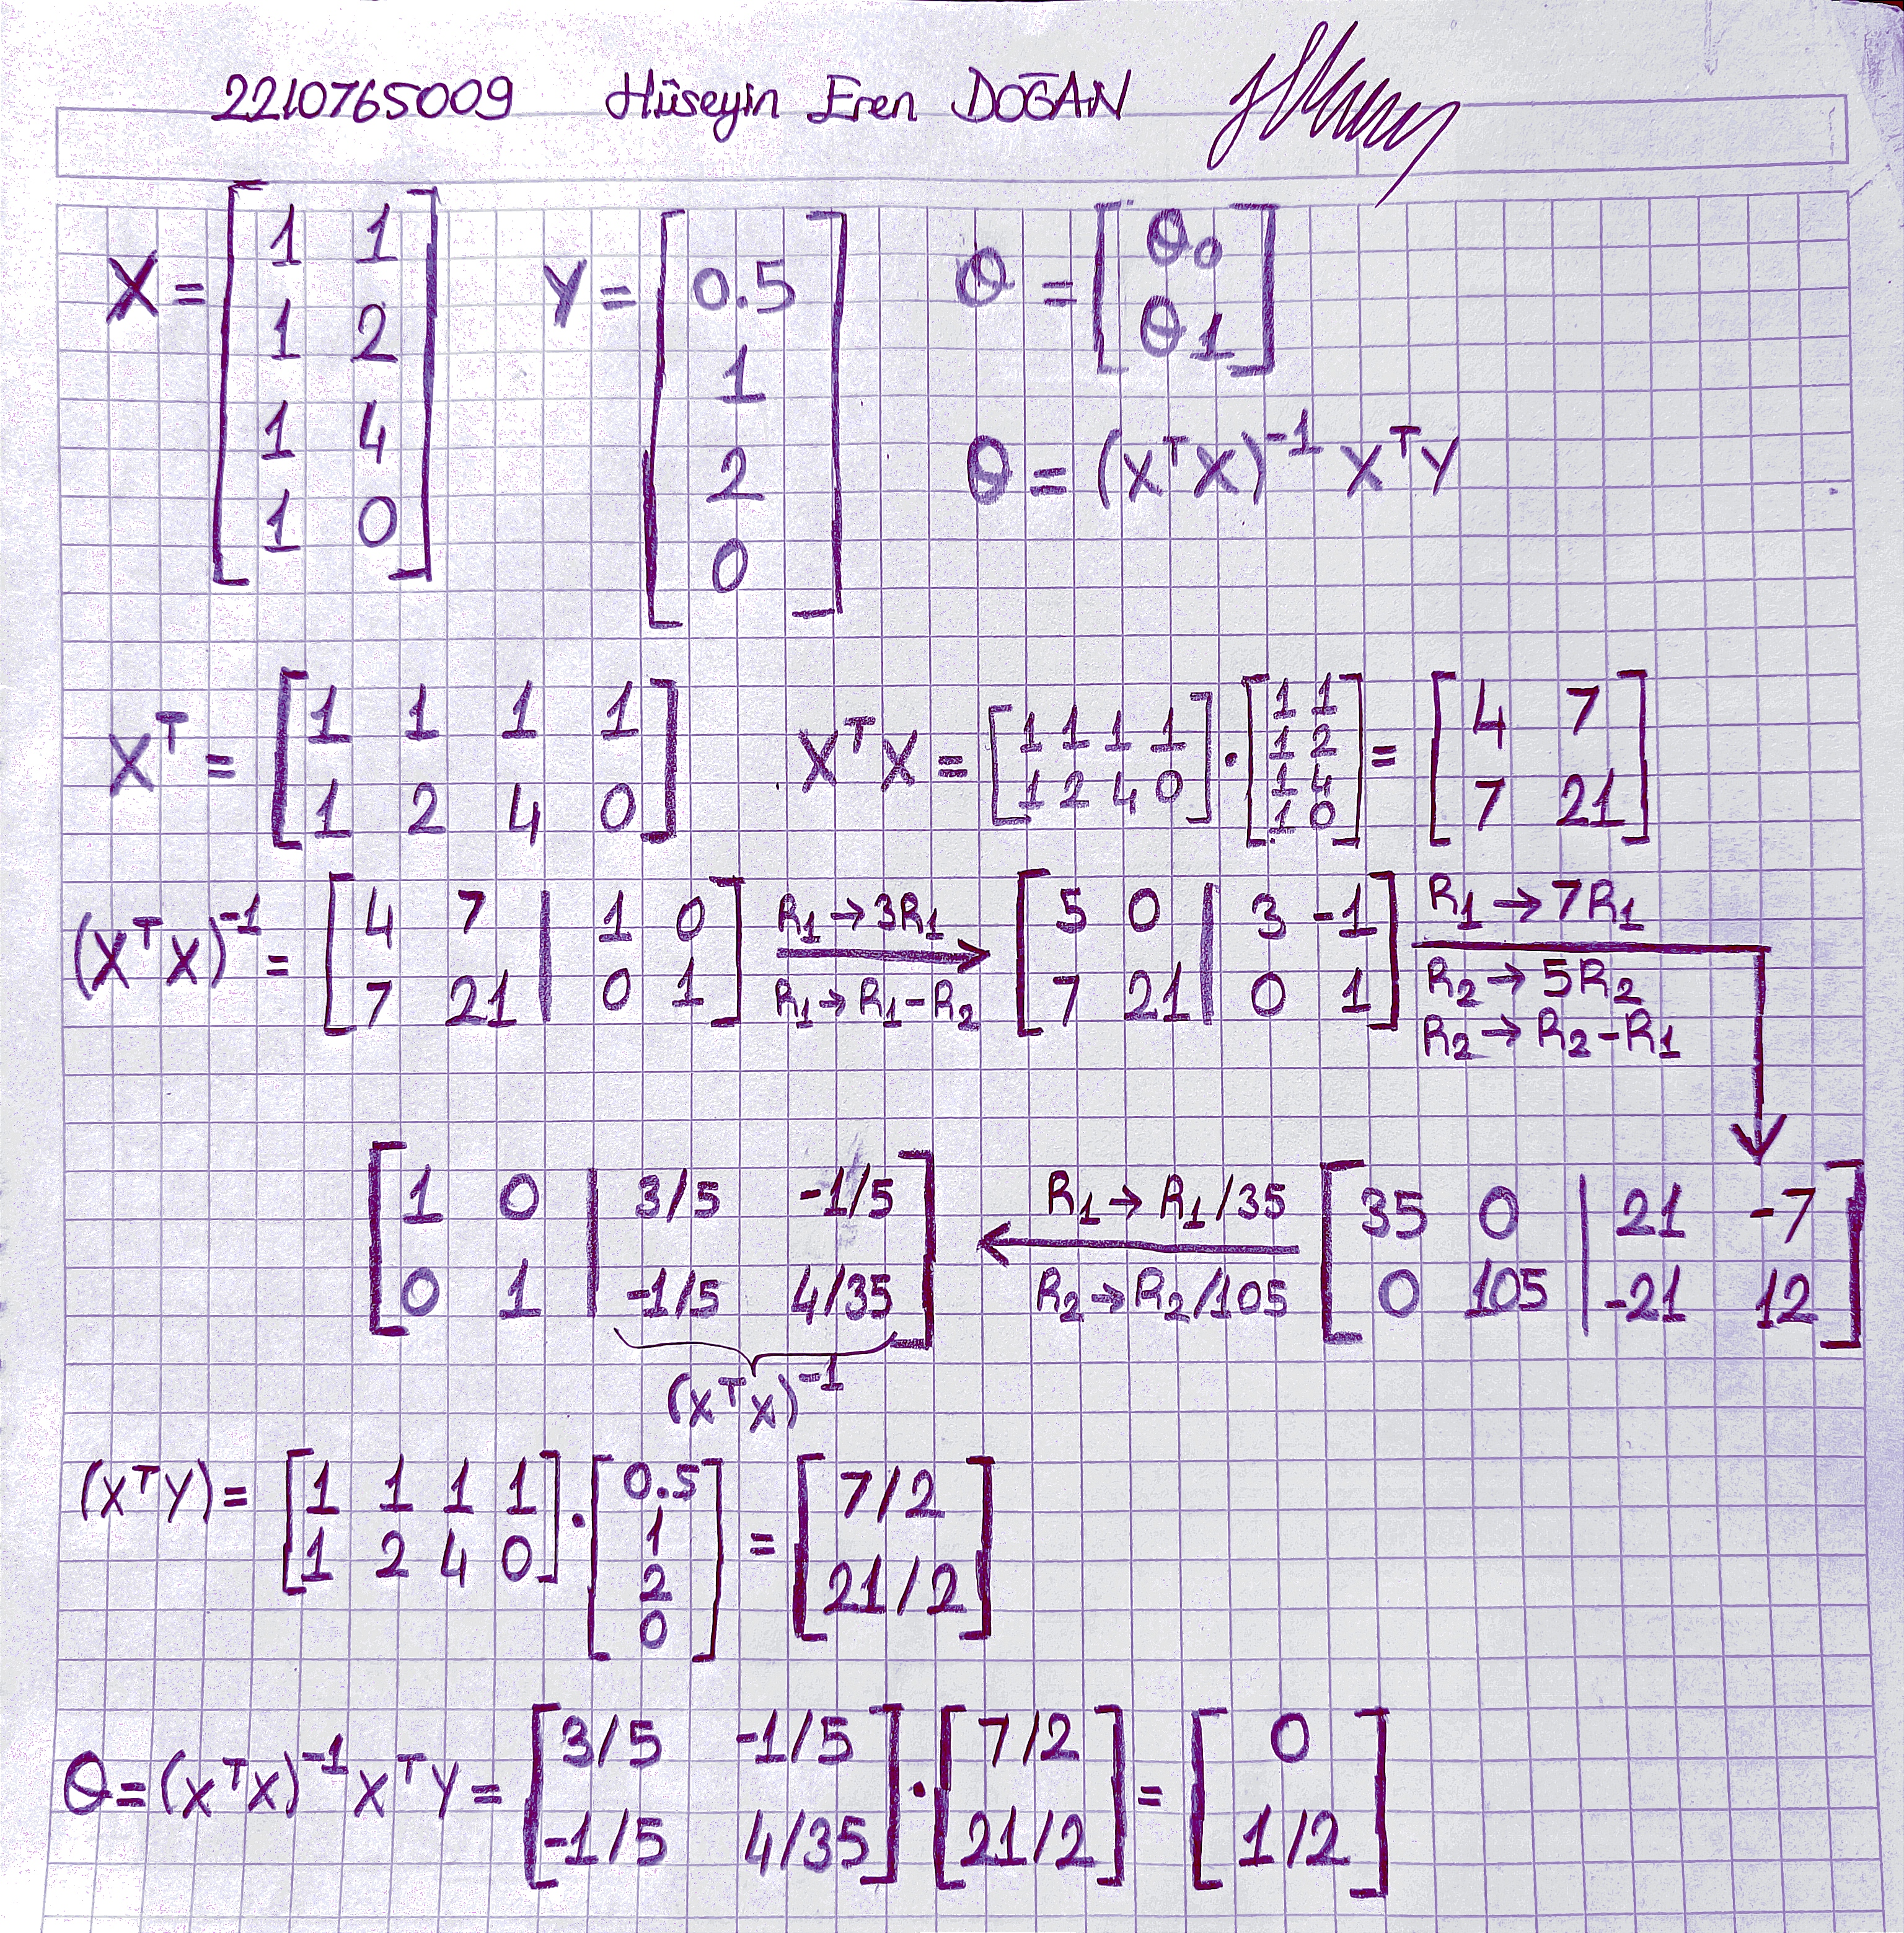

# Q2.4
**State a valid reason for feature scaling and explain why it is a valid reason with respect to your reasoning.**

Feature scaling is essential to ensure that all the features in a dataset have a consistent scale. This is necessary for various machine learning algorithms to perform effectively. When features are on different scales, some features may dominate the learning process, leading to biased or slow model training. Scaling ensures that all features contribute equally, aiding model convergence, interpretability, and performance.

# PART II: Anime Recommendation System

In [1]:
import pandas as pd
import numpy as np

# Reading datasets
animes = pd.read_csv("animes.csv")
user_rates_test = pd.read_csv("user_rates_test.csv")
user_rates_train = pd.read_csv("user_rates_train.csv")

# Checking if there is any missing value in datasets
if animes.isnull().values.any() == False: print("There is no missing values in anime dataset.")
if user_rates_test.isnull().values.any() == False: print("There is no missing values in test set.")
if user_rates_train.isnull().values.any() == False: print("There is no missing values in train set.")

There is no missing values in anime dataset.
There is no missing values in test set.
There is no missing values in train set.


In [2]:
# Visualizing datasets
animes

anime_id                             Name  \
0             1                     Cowboy Bebop   
1             5  Cowboy Bebop: Tengoku no Tobira   
2             6                           Trigun   
3             7               Witch Hunter Robin   
4             8                   Bouken Ou Beet   
...         ...                              ...   
24900     55731                      Wu Nao Monu   
24901     55732              Bu Xing Si: Yuan Qi   
24902     55733                      Di Yi Xulie   
24903     55734         Bokura no Saishuu Sensou   
24904     55735                   Shijuuku Nichi   

                                     Genres   Type         Studios     Source  \
0             Action, Award Winning, Sci-Fi     TV         Sunrise   Original   
1                            Action, Sci-Fi  Movie           Bones   Original   
2                 Action, Adventure, Sci-Fi     TV        Madhouse      Manga   
3      Action, Drama, Mystery, Supernatural     TV         Sunrise   Original   
4          Adventure, Fantasy, Supernatural     TV  Toei Animation      Manga   
...                                     ...    ...             ...        ...   
24900        Comedy, Fantasy, Slice of Life    ONA         UNKNOWN  Web manga   
24901            Action, Adventure, Fantasy    ONA         UNKNOWN  Web novel   
24902    Action, Adventure, Fantasy, Sci-Fi    ONA         UNKNOWN  Web novel   
24903                               UNKNOWN  Music         UNKNOWN   Original   
24904                               UNKNOWN  Music         UNKNOWN   Original   

            Duration                                          Image URL  
0      24 min per ep  https://cdn.myanimelist.net/images/anime/4/196...  
1        1 hr 55 min  https://cdn.myanimelist.net/images/anime/1439/...  
2      24 min per ep  https://cdn.myanimelist.net/images/anime/7/203...  
3      25 min per ep  https://cdn.myanimelist.net/images/anime/10/19...  
4      23 min per ep  https://cdn.myanimelist.net/images/anime/7/215...  
...              ...                                                ...  
24900        Unknown  https://cdn.myanimelist.net/images/anime/1386/...  
24901        Unknown  https://cdn.myanimelist.net/images/anime/1383/...  
24902        Unknown  https://cdn.myanimelist.net/images/anime/1130/...  
24903          3 min  https://cdn.myanimelist.net/images/anime/1931/...  
24904          3 min  https://cdn.myanimelist.net/images/anime/1902/...  

[24905 rows x 8 columns]

In [3]:
user_rates_train

user_id Username  anime_id                   Anime Title  rating
0          549   dotGif       790                    Ergo Proxy       9
1          549   dotGif       306   Abenobashi Mahou☆Shoutengai       8
2          549   dotGif        54             Appleseed (Movie)       7
3          549   dotGif        66  Azumanga Daiou The Animation       8
4          549   dotGif     28805                Bakemono no Ko       9
...        ...      ...       ...                           ...     ...
49355  1290429   Anka21      4898                  Kuroshitsuji      10
49356  1290429   Anka21      6707               Kuroshitsuji II       8
49357  1290429   Anka21      9136      Kuroshitsuji II Specials       9
49358  1290429   Anka21     10161                          No.6       9
49359  1290429   Anka21      1726                 Devil May Cry       8

[49360 rows x 5 columns]

In [4]:
user_rates_test

user_id    Username  anime_id                    Anime Title  rating
0      15885  hardcoreBC      2026              Hayate no Gotoku!       9
1      15885  hardcoreBC       120                  Fruits Basket      10
2      15885  hardcoreBC        71              Full Metal Panic!       9
3      15885  hardcoreBC        72      Full Metal Panic? Fumoffu      10
4      15885  hardcoreBC       121            Fullmetal Alchemist       9
..       ...         ...       ...                            ...     ...
872  1257993         LHT     13601                    Psycho-Pass      10
873  1257993         LHT       205               Samurai Champloo      10
874  1257993         LHT      7311  Suzumiya Haruhi no Shoushitsu      10
875  1257993         LHT       849     Suzumiya Haruhi no Yuuutsu       9
876  1257993         LHT      1735             Naruto: Shippuuden       6

[877 rows x 5 columns]

In [5]:
# Dropping unnecessary columns
animes = animes.drop(["Studios","Name","Image URL"], axis = 1)
animes

anime_id                                Genres   Type     Source  \
0             1         Action, Award Winning, Sci-Fi     TV   Original   
1             5                        Action, Sci-Fi  Movie   Original   
2             6             Action, Adventure, Sci-Fi     TV      Manga   
3             7  Action, Drama, Mystery, Supernatural     TV   Original   
4             8      Adventure, Fantasy, Supernatural     TV      Manga   
...         ...                                   ...    ...        ...   
24900     55731        Comedy, Fantasy, Slice of Life    ONA  Web manga   
24901     55732            Action, Adventure, Fantasy    ONA  Web novel   
24902     55733    Action, Adventure, Fantasy, Sci-Fi    ONA  Web novel   
24903     55734                               UNKNOWN  Music   Original   
24904     55735                               UNKNOWN  Music   Original   

            Duration  
0      24 min per ep  
1        1 hr 55 min  
2      24 min per ep  
3      25 min per ep  
4      23 min per ep  
...              ...  
24900        Unknown  
24901        Unknown  
24902        Unknown  
24903          3 min  
24904          3 min  

[24905 rows x 5 columns]

In [6]:
#One-Hot Encoding for 'Genres' column

animes["Genres"] = animes["Genres"].str.split(", ")
genres_list = []
for row in animes["Genres"]:
    genres_list.extend(row)
    
genres_set = set(genres_list)
genres_list = list(genres_set)

for genre in genres_list:
    animes[genre] = 0
for i in animes.index:
    genres = animes.iloc[i, 1]
    for genre in genres:
        idx = genres_list.index(genre)
        animes.iloc[i, idx + 5] = 1 
        
animes = animes.drop("Genres", axis = 1)
animes

anime_id   Type     Source       Duration  Award Winning  Girls Love  \
0             1     TV   Original  24 min per ep              1           0   
1             5  Movie   Original    1 hr 55 min              0           0   
2             6     TV      Manga  24 min per ep              0           0   
3             7     TV   Original  25 min per ep              0           0   
4             8     TV      Manga  23 min per ep              0           0   
...         ...    ...        ...            ...            ...         ...   
24900     55731    ONA  Web manga        Unknown              0           0   
24901     55732    ONA  Web novel        Unknown              0           0   
24902     55733    ONA  Web novel        Unknown              0           0   
24903     55734  Music   Original          3 min              0           0   
24904     55735  Music   Original          3 min              0           0   

       Suspense  Mystery  Adventure  Supernatural  ...  Erotica  Action  \
0             0        0          0             0  ...        0       1   
1             0        0          0             0  ...        0       1   
2             0        0          1             0  ...        0       1   
3             0        1          0             1  ...        0       1   
4             0        0          1             1  ...        0       0   
...         ...      ...        ...           ...  ...      ...     ...   
24900         0        0          0             0  ...        0       0   
24901         0        0          1             0  ...        0       1   
24902         0        0          1             0  ...        0       1   
24903         0        0          0             0  ...        0       0   
24904         0        0          0             0  ...        0       0   

       Boys Love  Gourmet  Horror  Romance  Drama  Fantasy  Comedy  \
0              0        0       0        0      0        0       0   
1              0        0       0        0      0        0       0   
2              0        0       0        0      0        0       0   
3              0        0       0        0      1        0       0   
4              0        0       0        0      0        1       0   
...          ...      ...     ...      ...    ...      ...     ...   
24900          0        0       0        0      0        1       1   
24901          0        0       0        0      0        1       0   
24902          0        0       0        0      0        1       0   
24903          0        0       0        0      0        0       0   
24904          0        0       0        0      0        0       0   

       Slice of Life  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
24900              1  
24901              0  
24902              0  
24903              0  
24904              0  

[24905 rows x 26 columns]

In [7]:
# One-Hot for 'Type' and 'Source' columns
animes = pd.get_dummies(animes, columns=["Type", "Source"])
animes

anime_id       Duration  Award Winning  Girls Love  Suspense  Mystery  \
0             1  24 min per ep              1           0         0        0   
1             5    1 hr 55 min              0           0         0        0   
2             6  24 min per ep              0           0         0        0   
3             7  25 min per ep              0           0         0        1   
4             8  23 min per ep              0           0         0        0   
...         ...            ...            ...         ...       ...      ...   
24900     55731        Unknown              0           0         0        0   
24901     55732        Unknown              0           0         0        0   
24902     55733        Unknown              0           0         0        0   
24903     55734          3 min              0           0         0        0   
24904     55735          3 min              0           0         0        0   

       Adventure  Supernatural  Sports  Hentai  ...  Source_Music  \
0              0             0       0       0  ...             0   
1              0             0       0       0  ...             0   
2              1             0       0       0  ...             0   
3              0             1       0       0  ...             0   
4              1             1       0       0  ...             0   
...          ...           ...     ...     ...  ...           ...   
24900          0             0       0       0  ...             0   
24901          1             0       0       0  ...             0   
24902          1             0       0       0  ...             0   
24903          0             0       0       0  ...             0   
24904          0             0       0       0  ...             0   

       Source_Novel  Source_Original  Source_Other  Source_Picture book  \
0                 0                1             0                    0   
1                 0                1             0                    0   
2                 0                0             0                    0   
3                 0                1             0                    0   
4                 0                0             0                    0   
...             ...              ...           ...                  ...   
24900             0                0             0                    0   
24901             0                0             0                    0   
24902             0                0             0                    0   
24903             0                1             0                    0   
24904             0                1             0                    0   

       Source_Radio  Source_Unknown  Source_Visual novel  Source_Web manga  \
0                 0               0                    0                 0   
1                 0               0                    0                 0   
2                 0               0                    0                 0   
3                 0               0                    0                 0   
4                 0               0                    0                 0   
...             ...             ...                  ...               ...   
24900             0               0                    0                 1   
24901             0               0                    0                 0   
24902             0               0                    0                 0   
24903             0               0                    0                 0   
24904             0               0                    0                 0   

       Source_Web novel  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
24900                 0  
24901                 1  
24902                 1  
24903                 0  
24904                 0  

[24905 rows x 48 columns]

In [8]:
# Converting values of 'Duration' column to minutes 

for i in animes.index:
    duration = animes.iloc[i, 1].split(" ")
    if duration[0] == "Unknown":
        animes.iloc[i, 1] = 0
    elif duration[1] == "hr":
        if len(duration) == 2:
            animes.iloc[i, 1]= int(duration[0]) * 60
        elif len(duration) > 2:
            if duration[2] != "per":
                animes.iloc[i, 1] = int(duration[0]) * 60 + int(duration[2])
            else:
                animes.iloc[i, 1]= int(duration[0]) * 60
    elif duration[1] == "min":
        animes.iloc[i, 1] = int(duration[0])
    elif duration[1] == "sec":
        animes.iloc[i, 1] = int(duration[0]) / 60

animes

anime_id Duration  Award Winning  Girls Love  Suspense  Mystery  \
0             1       24              1           0         0        0   
1             5      115              0           0         0        0   
2             6       24              0           0         0        0   
3             7       25              0           0         0        1   
4             8       23              0           0         0        0   
...         ...      ...            ...         ...       ...      ...   
24900     55731        0              0           0         0        0   
24901     55732        0              0           0         0        0   
24902     55733        0              0           0         0        0   
24903     55734        3              0           0         0        0   
24904     55735        3              0           0         0        0   

       Adventure  Supernatural  Sports  Hentai  ...  Source_Music  \
0              0             0       0       0  ...             0   
1              0             0       0       0  ...             0   
2              1             0       0       0  ...             0   
3              0             1       0       0  ...             0   
4              1             1       0       0  ...             0   
...          ...           ...     ...     ...  ...           ...   
24900          0             0       0       0  ...             0   
24901          1             0       0       0  ...             0   
24902          1             0       0       0  ...             0   
24903          0             0       0       0  ...             0   
24904          0             0       0       0  ...             0   

       Source_Novel  Source_Original  Source_Other  Source_Picture book  \
0                 0                1             0                    0   
1                 0                1             0                    0   
2                 0                0             0                    0   
3                 0                1             0                    0   
4                 0                0             0                    0   
...             ...              ...           ...                  ...   
24900             0                0             0                    0   
24901             0                0             0                    0   
24902             0                0             0                    0   
24903             0                1             0                    0   
24904             0                1             0                    0   

       Source_Radio  Source_Unknown  Source_Visual novel  Source_Web manga  \
0                 0               0                    0                 0   
1                 0               0                    0                 0   
2                 0               0                    0                 0   
3                 0               0                    0                 0   
4                 0               0                    0                 0   
...             ...             ...                  ...               ...   
24900             0               0                    0                 1   
24901             0               0                    0                 0   
24902             0               0                    0                 0   
24903             0               0                    0                 0   
24904             0               0                    0                 0   

       Source_Web novel  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
24900                 0  
24901                 1  
24902                 1  
24903                 0  
24904                 0  

[24905 rows x 48 columns]

In [9]:
# Merging movie data with user training data
train = pd.merge(user_rates_train, animes, on='anime_id')
train

user_id     Username  anime_id  \
0          549       dotGif       790   
1         3242         KIN_       790   
2         9377      zaragas       790   
3        11092      mafia89       790   
4        13980   xaeonbluex       790   
...        ...          ...       ...   
49355  1262087  Temmy-Windy      9204   
49356  1266743       pftion     21647   
49357  1272113    Ramington     13333   
49358  1285881      KeezNah      2010   
49359  1286187       Oxidia      5256   

                                             Anime Title  rating Duration  \
0                                             Ergo Proxy       9       25   
1                                             Ergo Proxy       9       25   
2                                             Ergo Proxy      10       25   
3                                             Ergo Proxy       8       25   
4                                             Ergo Proxy      10       25   
...                                                  ...     ...      ...   
49355                                  Omae Umasou da na       9       90   
49356                                  Tamako Love Story       8       83   
49357                                          Tari Tari       8       24   
49358                        Taiho Shichau zo in America       5       23   
49359  Pokemon Fushigi no Dungeon: Toki no Tankentai,...       9       21   

       Award Winning  Girls Love  Suspense  Mystery  ...  Source_Music  \
0                  0           0         0        1  ...             0   
1                  0           0         0        1  ...             0   
2                  0           0         0        1  ...             0   
3                  0           0         0        1  ...             0   
4                  0           0         0        1  ...             0   
...              ...         ...       ...      ...  ...           ...   
49355              0           0         0        0  ...             0   
49356              1           0         0        0  ...             0   
49357              0           0         0        0  ...             0   
49358              0           0         0        0  ...             0   
49359              0           0         0        0  ...             0   

       Source_Novel  Source_Original  Source_Other  Source_Picture book  \
0                 0                1             0                    0   
1                 0                1             0                    0   
2                 0                1             0                    0   
3                 0                1             0                    0   
4                 0                1             0                    0   
...             ...              ...           ...                  ...   
49355             0                0             0                    1   
49356             0                1             0                    0   
49357             0                1             0                    0   
49358             0                0             0                    0   
49359             0                0             0                    0   

       Source_Radio  Source_Unknown  Source_Visual novel  Source_Web manga  \
0                 0               0                    0                 0   
1                 0               0                    0                 0   
2                 0               0                    0                 0   
3                 0               0                    0                 0   
4                 0               0                    0                 0   
...             ...             ...                  ...               ...   
49355             0               0                    0                 0   
49356             0               0                    0                 0   
49357             0               0                    0                 0   
49358             0

In [10]:
# Scaling the data of some columns for fitting the data to the model

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train[['Duration']])
train['Duration_scaled'] = scaler.transform(train[['Duration']])

scaler.fit(train[['user_id']])
train['user_id_scaled'] = scaler.transform(train[['user_id']])

scaler.fit(train[['anime_id']])
train['anime_id_scaled'] = scaler.transform(train[['anime_id']])

train = train.drop(["Duration","user_id","anime_id","Anime Title","Username"], axis = 1)

train

rating  Award Winning  Girls Love  Suspense  Mystery  Adventure  \
0           9              0           0         0        1          0   
1           9              0           0         0        1          0   
2          10              0           0         0        1          0   
3           8              0           0         0        1          0   
4          10              0           0         0        1          0   
...       ...            ...         ...       ...      ...        ...   
49355       9              0           0         0        0          1   
49356       8              1           0         0        0          0   
49357       8              0           0         0        0          0   
49358       5              0           0         0        0          0   
49359       9              0           0         0        0          1   

       Supernatural  Sports  Hentai  Sci-Fi  ...  Source_Other  \
0                 0       0       0       1  ...             0   
1                 0       0       0       1  ...             0   
2                 0       0       0       1  ...             0   
3                 0       0       0       1  ...             0   
4                 0       0       0       1  ...             0   
...             ...     ...     ...     ...  ...           ...   
49355             0       0       0       0  ...             0   
49356             0       0       0       0  ...             0   
49357             0       0       0       0  ...             0   
49358             0       0       0       0  ...             0   
49359             0       0       0       0  ...             0   

       Source_Picture book  Source_Radio  Source_Unknown  Source_Visual novel  \
0                        0             0               0                    0   
1                        0             0               0                    0   
2                        0             0               0                    0   
3                        0             0               0                    0   
4                        0             0               0                    0   
...                    ...           ...             ...                  ...   
49355                    1             0               0                    0   
49356                    0             0               0                    0   
49357                    0             0               0                    0   
49358                    0             0               0                    0   
49359                    0             0               0                    0   

       Source_Web manga  Source_Web novel  Duration_scaled  user_id_scaled  \
0                     0                 0         0.146269        0.000000   
1                     0                 0         0.146269        0.002088   
2                     0                 0         0.146269        0.006844   
3                     0                 0         0.146269        0.008174   
4                     0                 0         0.146269        0.010413   
...                 ...               ...              ...             ...   
49355                 0                 0         0.534328        0.978027   
49356                 0                 0         0.492537        0.981637   
49357                 0                 0         0.140299        0.985800   
49358                 0                 0         0.134328        0.996474   
49359                 0                 0         0.122388        0.996711   

       anime_id_scaled  
0             0.014845  
1             0.014845  
2             0.014845  
3             0.014845  
4             0.014845  
...                ...  
49355         0.173158  
49356         0.407278  
49357         0.250847  
49358         0.037800  
49359         0.098875  

[49360 rows x 50 columns]

In [11]:
#Same process on the test set

test = pd.merge(user_rates_test, animes, on="anime_id")

scaler.fit(test[['Duration']])
test['Duration_scaled'] = scaler.transform(test[['Duration']])

scaler.fit(test[['user_id']])
test['user_id_scaled'] = scaler.transform(test[['user_id']])

scaler.fit(test[['anime_id']])
test['anime_id_scaled'] = scaler.transform(test[['anime_id']])

test = test.drop(["Duration","user_id","anime_id","Anime Title","Username"], axis = 1)

test

rating  Award Winning  Girls Love  Suspense  Mystery  Adventure  \
0         9              0           0         0        0          0   
1         7              0           0         0        0          0   
2        10              0           0         0        0          0   
3         9              0           0         0        0          0   
4         7              0           0         0        0          0   
..      ...            ...         ...       ...      ...        ...   
872       7              0           0         0        0          0   
873       9              1           0         0        0          1   
874       8              0           0         0        0          0   
875      10              0           0         1        1          0   
876      10              1           0         0        1          0   

     Supernatural  Sports  Hentai  Sci-Fi  ...  Source_Other  \
0               0       0       0       0  ...             0   
1               0       0       0       0  ...             0   
2               1       0       0       0  ...             0   
3               1       0       0       0  ...             0   
4               1       0       0       0  ...             0   
..            ...     ...     ...     ...  ...           ...   
872             0       0       0       1  ...             0   
873             0       0       0       1  ...             0   
874             0       0       0       0  ...             0   
875             0       0       0       1  ...             0   
876             1       0       0       1  ...             0   

     Source_Picture book  Source_Radio  Source_Unknown  Source_Visual novel  \
0                      0             0               0                    0   
1                      0             0               0                    0   
2                      0             0               0                    0   
3                      0             0               0                    0   
4                      0             0               0                    0   
..                   ...           ...             ...                  ...   
872                    0             0               0                    0   
873                    0             0               0                    0   
874                    0             0               0                    0   
875                    0             0               0                    0   
876                    0             0               0                    0   

     Source_Web manga  Source_Web novel  Duration_scaled  user_id_scaled  \
0                   0                 0          0.14375        0.000000   
1                   0                 0          0.14375        0.013385   
2                   0                 0          0.14375        0.000000   
3                   0                 0          0.14375        0.377518   
4                   0                 0          0.14375        0.380721   
..                ...               ...              ...             ...   
872                 0                 0          0.15625        0.957326   
873                 0                 0          0.76875        0.957326   
874                 0                 0          0.14375        1.000000   
875                 0                 0          0.13750        1.000000   
876                 0                 0          1.00000        1.000000   

     anime_id_scaled  
0           0.040898  
1           0.040898  
2           0.002403  
3           0.002403  
4           0.002403  
..               ...  
872         0.062306  
873         0.010341  
874         0.297694  
875         0.274670  
876         0.147635  

[877 rows x 50 columns]

In [12]:
#Selecting target column and features
x_train = train.drop('rating', axis=1)
y_train = train['rating']
x_test = test.drop('rating', axis=1)
y_test = test['rating']

In [13]:
from numpy.linalg import norm

In [14]:
# Defining the kNearestNeighbor algorithm, similarity and error functions

def kNN(k, x_train, y_train, x_test, sim_func, weighted=False):
    predictions = []
    for i in range(len(x_test)):
        distances = []
        for j in range(len(x_train)):
            distance = sim_func(x_test[i], x_train[j])
            distances.append((y_train[j], distance))
        if weighted == True:
            distances.sort(key=lambda x: x[1], reverse=True)
            neighbors = distances[:k]
            sum_w = sum([n[1] for n in neighbors])
            prediction = sum([n[0] * n[1] for n in neighbors]) / sum_w if sum_w > 0 else 0
            predictions.append(prediction)
        elif weighted == False:
            distances.sort(key=lambda x: x[1], reverse=True)
            neighbors = distances[:k]
            prediction = np.mean([n[0] for n in neighbors])
            predictions.append(prediction)
    return predictions


def cos_sim(v1,v2):
    if norm(v1) == 0 or norm(v2) == 0:
        return 0
    return np.dot(v1, v2) / (norm(v1) * norm(v2))

def MAE(y_true, y_pred):
    total_error = [abs(x - y) for x, y in zip(y_pred, y_true)]
    return sum(total_error) / len(total_error)
    

In [15]:
from sklearn.model_selection import KFold
 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#To store mean absolute error results for different k values
mean_mae_knn = []
mean_mae_wknn = []

k_values = [3,5,7]

for k in k_values:
    knn_mae_scores = []
    wknn_mae_scores = []
    
    #Performing K-Fold Cross-Validation
    for train_index, test_index in kf.split(x_train):
        
        xtrain, xtest = x_train.iloc[train_index], x_train.iloc[test_index]
        ytrain, ytest = y_train.iloc[train_index], y_train.iloc[test_index]
        
        
        #Performing kNN models and getting predictions
        y_pred_knn = kNN(k, xtrain.to_numpy(), ytrain.to_numpy(), xtest.to_numpy(), cos_sim, weighted=False)
        y_pred_wknn = kNN(k, xtrain.to_numpy(), ytrain.to_numpy(), xtest.to_numpy(), cos_sim, weighted=True)
    
        #Calculating validation errors
        knn_mae = MAE(ytest, y_pred_knn)
        wknn_mae = MAE(ytest, y_pred_wknn)
        
        #Storing error scores
        knn_mae_scores.append(knn_mae)
        wknn_mae_scores.append(wknn_mae)
        
    mean_mae_knn.append(np.mean(knn_mae_scores))
    mean_mae_wknn.append(np.mean(wknn_mae_scores))
    
    #Printing results of error scores
    for i, mae in enumerate(knn_mae_scores):
        print(f"For k={k} {i + 1}-fold kNN MAE = {mae:.4f}")
    print(f"For k={k} kNN mean error: {np.mean(knn_mae_scores)}\n")
        
    for i, mae in enumerate(wknn_mae_scores):
        print(f"For k={k} {i + 1}-fold weighted-kNN MAE = {mae:.4f}")
    print(f"For k={k} weighted-kNN mean error: {np.mean(wknn_mae_scores)}\n")


For k=3 1-fold kNN MAE = 1.2715
For k=3 2-fold kNN MAE = 1.2125
For k=3 3-fold kNN MAE = 1.2405
For k=3 4-fold kNN MAE = 1.1833
For k=3 5-fold kNN MAE = 1.2031
For k=3 kNN mean error: 1.2221722427582298

For k=3 1-fold weighted-kNN MAE = 1.2715
For k=3 2-fold weighted-kNN MAE = 1.2125
For k=3 3-fold weighted-kNN MAE = 1.2405
For k=3 4-fold weighted-kNN MAE = 1.1833
For k=3 5-fold weighted-kNN MAE = 1.2031
For k=3 weighted-kNN mean error: 1.2221921044790596

For k=5 1-fold kNN MAE = 1.2157
For k=5 2-fold kNN MAE = 1.1704
For k=5 3-fold kNN MAE = 1.1306
For k=5 4-fold kNN MAE = 1.1612
For k=5 5-fold kNN MAE = 1.1405
For k=5 kNN mean error: 1.16368757659512

For k=5 1-fold weighted-kNN MAE = 1.2160
For k=5 2-fold weighted-kNN MAE = 1.1706
For k=5 3-fold weighted-kNN MAE = 1.1306
For k=5 4-fold weighted-kNN MAE = 1.1613
For k=5 5-fold weighted-kNN MAE = 1.1407
For k=5 weighted-kNN mean error: 1.163832477304441

For k=7 1-fold kNN MAE = 1.1611
For k=7 2-fold kNN MAE = 1.1512
For k=7 3-fold 

Text(0, 0.5, 'Mean Absolute Error')

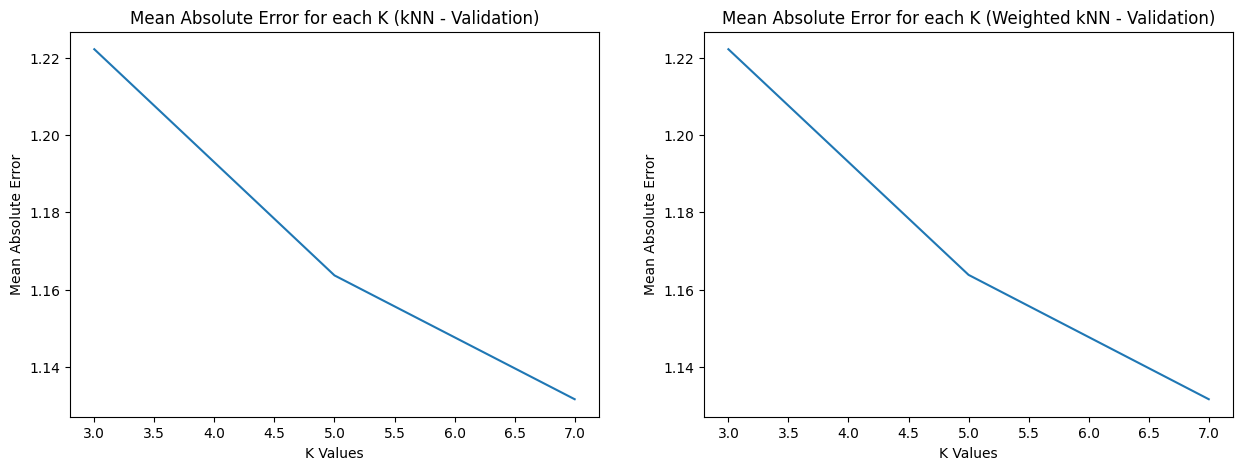

In [16]:
import matplotlib.pyplot as plt

#Plotting MAE scores - k values graphs for each two models

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(k_values, mean_mae_knn)
ax[0].set_title('Mean Absolute Error for each K (kNN - Validation)')
ax[0].set_xlabel('K Values')
ax[0].set_ylabel('Mean Absolute Error')

ax[1].plot(k_values, mean_mae_wknn)
ax[1].set_title('Mean Absolute Error for each K (Weighted kNN - Validation)')
ax[1].set_xlabel('K Values')
ax[1].set_ylabel('Mean Absolute Error')


# Test

In [17]:
#To store mean absolute error results for different k values
mean_mae_knn_test = []
mean_mae_wknn_test = []

for k in k_values:
    knn_mae_scores_test = []
    wknn_mae_scores_test = []
    
    #Performing kNN models and getting predictions
    y_pred_knn_test = kNN(k, x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), cos_sim, weighted=False)
    y_pred_wknn_test = kNN(k, x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), cos_sim, weighted=True)

    # Calculating test errors
    knn_mae_test = MAE(y_test, y_pred_knn_test)
    wknn_mae_test = MAE(y_test, y_pred_wknn_test)

    #Storing error scores
    knn_mae_scores_test.append(knn_mae_test)
    wknn_mae_scores_test.append(wknn_mae_test)
    
    mean_mae_knn_test.append(np.mean(knn_mae_scores_test))
    mean_mae_wknn_test.append(np.mean(wknn_mae_scores_test))

#Printing results of error scores
for i in range(3):
    print(f"k: {k_values[i]}\t MAE(kNN): {mean_mae_knn_test[i]}\t MAE(weighted-kNN): {mean_mae_wknn_test[i]}")
 

k: 3	 MAE(kNN): 1.180347328423404	 MAE(weighted-kNN): 1.1803490164142056
k: 5	 MAE(kNN): 1.1379342048604753	 MAE(weighted-kNN): 1.1380567506330788
k: 7	 MAE(kNN): 1.1401899522385064	 MAE(weighted-kNN): 1.140225712330479


Text(0, 0.5, 'Mean Absolute Error')

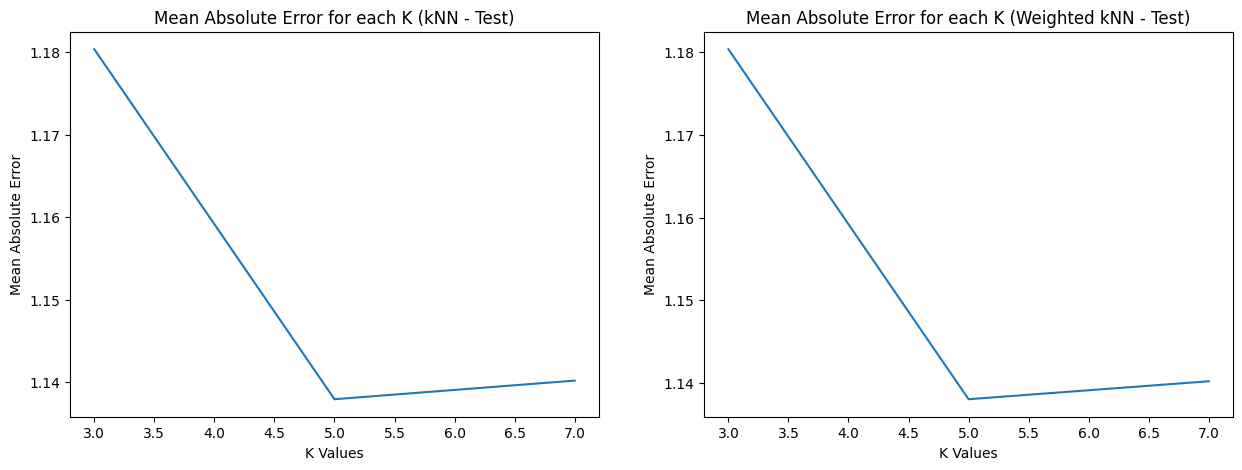

In [18]:
import matplotlib.pyplot as plt

#Plotting MAE scores - k values graphs for each two models

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(k_values, mean_mae_knn_test)
ax[0].set_title('Mean Absolute Error for each K (kNN - Test)')
ax[0].set_xlabel('K Values')
ax[0].set_ylabel('Mean Absolute Error')

ax[1].plot(k_values, mean_mae_wknn_test)
ax[1].set_title('Mean Absolute Error for each K (Weighted kNN - Test)')
ax[1].set_xlabel('K Values')
ax[1].set_ylabel('Mean Absolute Error')


# Analysis of Results



In [19]:
print("Results of Validation Errors")
for i in range(3):
    print(f"k: {k_values[i]}\t MAE(kNN): {mean_mae_knn[i]}\t MAE(weighted-kNN): {mean_mae_wknn[i]}")


print()
print("Results of Test Errors")
for i in range(3):
    print(f"k: {k_values[i]}\t MAE(kNN): {mean_mae_knn_test[i]}\t MAE(weighted-kNN): {mean_mae_wknn_test[i]}")

Results of Validation Errors
k: 3	 MAE(kNN): 1.2221722427582298	 MAE(weighted-kNN): 1.2221921044790596
k: 5	 MAE(kNN): 1.16368757659512	 MAE(weighted-kNN): 1.163832477304441
k: 7	 MAE(kNN): 1.1316725110175978	 MAE(weighted-kNN): 1.131674267729603

Results of Test Errors
k: 3	 MAE(kNN): 1.180347328423404	 MAE(weighted-kNN): 1.1803490164142056
k: 5	 MAE(kNN): 1.1379342048604753	 MAE(weighted-kNN): 1.1380567506330788
k: 7	 MAE(kNN): 1.1401899522385064	 MAE(weighted-kNN): 1.140225712330479


Firstly if we look at performances of **kNN** and **weighted-kNN** algorithms and compare them, we'll see they're so similar cause there is a difference which can be ignored in MAE in both validation and test results. Reason of this situation might be getting same ratings from chosen neighbors. Or noise in data makes weighting algorithm unnecessary so we'll get same results in these models.

Then continue the analysis for differences between validation and test results. 
In validation, the k value which has the lowest MAE score is 7. MAE score is decreasing while k value is increasing in this part. 
In test part, k=5 value and k=7 has have similar MAE scores while k=5 has the lowest. We can say that the optimal k value should be 5 with looking test results but since they have so close values with 7 and k=7 surely has the lowest error in the validation part, i think the optimal k value is k=7 in these three values, if we can use higher k values it might be more effective for these models. And also some changes, additions or deletions in the data could be better for the model's accuracy. 
